In [1]:
train_path = "dataset/train"
val_path = "dataset/val"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
model = Sequential()

# 4 convolution layers

model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = (224,224,3)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy,optimizer = 'adam', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [5]:
# Training

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,

)

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [6]:
train_gen = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 184 images belonging to 2 classes.


In [7]:
train_gen.class_indices

{'covid_p': 0, 'normal': 1}

In [8]:
val_gen = test_dataset.flow_from_directory(
    'dataset/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 48 images belonging to 2 classes.


In [9]:
hist = model.fit_generator(
    train_gen,
    steps_per_epoch=10,
    epochs = 20,
    validation_data = val_gen,
    validation_steps = 2
)


Epoch 1/20
10/10 [==============================] - 67s 7s/step - loss: 0.9408 - accuracy: 0.5362 - val_loss: 0.7172 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 71s 7s/step - loss: 0.6656 - accuracy: 0.5641 - val_loss: 0.6187 - val_accuracy: 0.8125
Epoch 3/20
10/10 [==============================] - 69s 7s/step - loss: 0.4935 - accuracy: 0.7730 - val_loss: 0.3116 - val_accuracy: 0.8333
Epoch 4/20
10/10 [==============================] - 65s 7s/step - loss: 0.3078 - accuracy: 0.8846 - val_loss: 0.2212 - val_accuracy: 0.8958
Epoch 5/20
10/10 [==============================] - 69s 7s/step - loss: 0.3008 - accuracy: 0.9054 - val_loss: 0.2118 - val_accuracy: 0.9583
Epoch 6/20
10/10 [==============================] - 73s 7s/step - loss: 0.2131 - accuracy: 0.9199 - val_loss: 0.1062 - val_accuracy: 0.9375
Epoch 7/20
10/10 [==============================] - 73s 7s/step - loss: 0.2260 - accuracy: 0.9263 - val_loss: 0.2447 - val_accuracy: 0.9375
Epoch 8/20
10/10 [=

In [10]:
model.save("Covid_detection.h5")

In [11]:
model.evaluate_generator(train_gen)

[0.07642696052789688, 0.97826087474823]

In [12]:
model.evaluate_generator(val_gen)

[0.17409595847129822, 0.9583333134651184]

In [13]:
import os

model = load_model("Covid_detection.h5")
train_gen.class_indices

{'covid_p': 0, 'normal': 1}

In [14]:
y_actual = []
y_test= []

In [15]:
for i in os.listdir("./dataset/val/normal/"):
    img = image.load_img("./dataset/val/normal/" + i, target_size = (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis= 0)
    pred = model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

In [16]:
for i in os.listdir("./dataset/val/covid_p/"):
    img = image.load_img("./dataset/val/covid_p/" + i, target_size = (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis= 0)
    pred = model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [17]:
print(y_actual)
print(y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [19]:
from sklearn.metrics import confusion_matrix

In [24]:
matrix = confusion_matrix(y_actual,y_test)

In [25]:
import seaborn as sn

(2.0, 0.0)

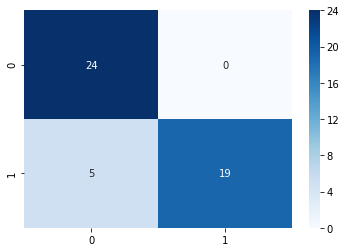

In [28]:
ax = sn.heatmap(matrix,cmap = "Blues", annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)